## LITHOFACIES PREDICTION WITH KNN ML ALGORITHM

### METHODOLOGY

#### DATA LOADING OF PREPROCESSED DATA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = "lithofacies_clean_data.xlsx"
data = pd.read_excel(file_path)
data

,DEPTH,CAL,GR,LLD9,NPHI,RHOB
0,4018.5,12.389345,25.522592,0.198473,0.389725,2.072117
1,4019.0,12.387620,25.655850,0.187327,0.393031,2.072115
2,4019.5,12.385917,25.788819,0.175347,0.396271,2.072112
3,4020.0,12.384241,25.921299,0.162549,0.399440,2.072108
4,4020.5,12.382596,26.053093,0.148953,0.402534,2.072103
...,...,...,...,...,...,...
11788,9916.0,11.982986,67.881466,1.652563,0.260540,2.277061
11789,9916.5,11.982885,67.878288,1.652274,0.260545,2.277035
11790,9917.0,11.982803,67.875693,1.652035,0.260549,2.277013
11791,9917.5,11.982735,67.873600,1.651840,0.260553,2.276995


In [3]:
data.describe()

,DEPTH,CAL,GR,LLD9,NPHI,RHOB
count,11793.000000,11793.000000,11793.000000,11793.000000,11793.000000,11793.000000
mean,6969.898796,13.029387,58.804504,16.141283,0.317557,2.175738
std,1702.415420,1.336274,22.827318,18.881235,0.058952,0.062719
min,4018.500000,11.753980,24.317694,-3.569161,0.121566,2.069205
25%,5496.000000,12.141856,37.562266,1.364376,0.282942,2.129316
50%,6970.000000,12.336220,53.521010,6.176394,0.309564,2.160316
75%,8444.000000,13.463845,79.376749,28.161993,0.349322,2.218303
max,9918.000000,17.683662,102.195299,60.791391,0.483906,2.333862


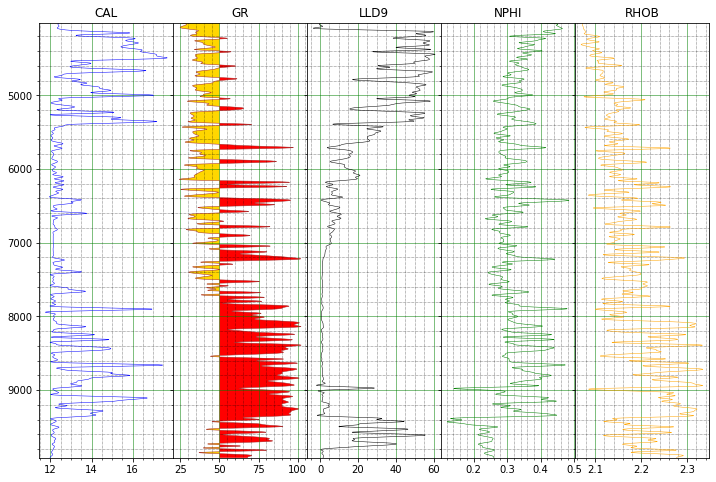

In [4]:

log_data = data.values
rows, cols = 1,5
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,8), sharey=True)
mnemonics = ['CAL','GR', 'LLD9','NPHI','RHOB']
color = ['blue','brown','black','green','orange']
for i in range(cols):
    ax[i].plot(log_data[:,i+1], log_data[:,0],linewidth='0.5',color=color[i])
    ax[i].set_ylim(max(log_data[:, 0]), min(log_data[:, 0]))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') #this is a comment
    ax[i].set_title('%s' %mnemonics[i])

y2=log_data[:,2] #extract data from the particular column to color
y1=y2*0+50 #shale line
ax[1].fill_betweenx(log_data[:,0], y1,y2, where=(y1>=y2), color='gold',linewidth=0)
ax[1].fill_betweenx(log_data[:,0], y1,y2, where=(y1<y2), color='red',linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()


### CALCULATING VOLUME OF SHALE $ V_{SH} $
This is calculated using the following equation:
* $ V_{sh} = \frac {GR_{log} - GR_{min}} {GR_{max} - GR_{min}} $

In [5]:
depth=data.DEPTH.values
gamma = data.GR. values
gamma_min = 24.317694
gamma_max = 102.195299
#VSH = [(gamma_reading - gamma_min) / (gamma_max - gamma_min) for gamma_reading in gamma]
#data['VSH'] = VSH

### COMPUTING LOG RATION (DENSITY/NEUTRON)

In [6]:
#ND_RATIO = []
#for i in range(len(depth)):
 #   ratio = data.loc[i, 'RHOB'] / data.loc[i, 'NPHI']
  #  ND_RATIO.append(ratio)  # Use append to add the ratio to the list

#ND_RATIO = np.array(ND_RATIO)
#data['NDR'] = ND_RATIO


In [7]:
data

,DEPTH,CAL,GR,LLD9,NPHI,RHOB
0,4018.5,12.389345,25.522592,0.198473,0.389725,2.072117
1,4019.0,12.387620,25.655850,0.187327,0.393031,2.072115
2,4019.5,12.385917,25.788819,0.175347,0.396271,2.072112
3,4020.0,12.384241,25.921299,0.162549,0.399440,2.072108
4,4020.5,12.382596,26.053093,0.148953,0.402534,2.072103
...,...,...,...,...,...,...
11788,9916.0,11.982986,67.881466,1.652563,0.260540,2.277061
11789,9916.5,11.982885,67.878288,1.652274,0.260545,2.277035
11790,9917.0,11.982803,67.875693,1.652035,0.260549,2.277013
11791,9917.5,11.982735,67.873600,1.651840,0.260553,2.276995


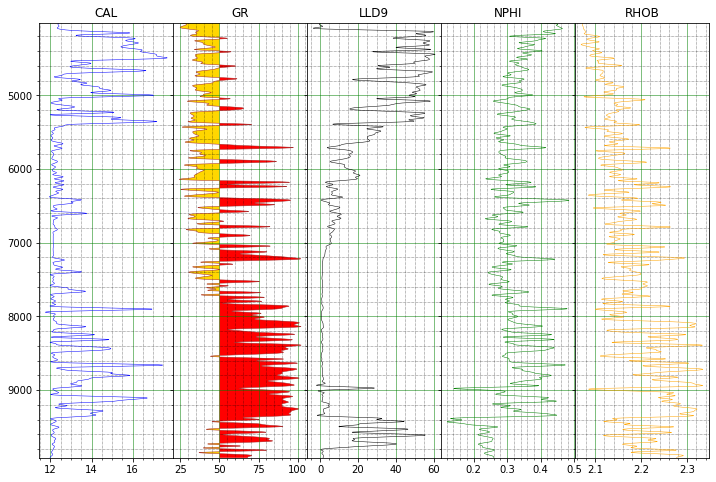

In [11]:
log_data = data.values
rows, cols = 1,5
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,8), sharey=True)
mnemonics = ['CAL','GR', 'LLD9','NPHI','RHOB']
color = ['blue','brown','black','green','orange','red','purple']
for i in range(cols):
    ax[i].plot(log_data[:,i+1], log_data[:,0],linewidth='0.5',color=color[i])
    ax[i].set_ylim(max(log_data[:, 0]), min(log_data[:, 0]))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') #this is a comment
    ax[i].set_title('%s' %mnemonics[i])

y2=log_data[:,2] #extract data from the particular column to color
y1=y2*0+50 #shale line
ax[1].fill_betweenx(log_data[:,0], y1,y2, where=(y1>=y2), color='gold',linewidth=0)
ax[1].fill_betweenx(log_data[:,0], y1,y2, where=(y1<y2), color='red',linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()

#### LITHOFACIES CLASSIFICATION

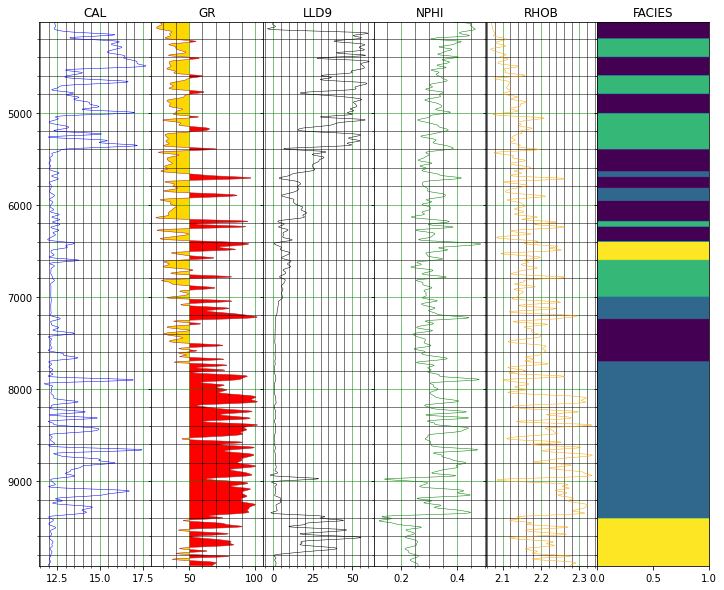

In [12]:
import pandas as pd
#pd.options.mode.chained_assignment = None  # default='warn'

tb=[3000,4200,4400,4600,4800,5010,5400,5640,5700,5820,5960,6180,6240,6400,6600,7000,7240,7700,9400,10000]
f=[1,3,1,3,1,3,1,2,1,2,1,3,1,4,3,2,1,2,4]

facies=[]
for i in range(len(depth)):
    for j in range(len(tb)-1):
        if depth[i]>tb[j] and depth[i] <= tb[j+1]:
            facies.append(f[j])            

data = data.copy() # COPY THE ORIGINAL DATAFRAME
data['FACIES'] = facies #APPEND THE A NEW FACIES COLUMN
#data.loc[:, 'FACIES'] = facies
data.to_csv('KNN_well_logs_facies.csv',index=False)
facies_log_data = data.values
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
labels = ['CAL','GR','LLD9','NPHI','RHOB','FACIES']
color = ['blue','brown','black','green','orange','red','purple']
for i in range(cols):
    if i<cols-1:
        ax[i].plot(facies_log_data[:,i+1], facies_log_data[:,0],linewidth='0.5', color= color[i])
        ax[i].set_ylim(max(facies_log_data[:,0]), min(facies_log_data[:,0]))
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5',color='green')
        ax[i].grid(which='minor', linestyle='-', linewidth='0.5',color='black')
        ax[i].set_title(labels[i])
    elif i==cols-1:
        F = np.vstack((facies,facies)).T
        ax[i].imshow(F, aspect='auto',extent=[0,1,max(facies_log_data[:, 0]), min(facies_log_data[:, 0])])
        ax[i].set_title(labels[i])

y2=facies_log_data[:,2] #particular column to color
y1=y2*0+50 #shale line
ax[1].fill_betweenx(facies_log_data[:,0], y1,y2, where=(y1>=y2), color='gold',linewidth=0) 
ax[1].fill_betweenx(facies_log_data[:,0], y1,y2, where=(y1<y2), color='red',linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()

#### FACIES PREDICTION WITH KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, median_absolute_error,accuracy_score, f1_score
from sklearn.model_selection import cross_validate 
import sklearn
import time

#### COPY THE ORIGINAL DATA

In [46]:
# COPY THE ORIGINAL NUMPY ARRAY DATA AND CONVERT BACK TO A DATA FRAME
pred_log_data = data.copy()
pred_log_data

,DEPTH,CAL,GR,LLD9,NPHI,RHOB,FACIES
0,4018.5,12.389345,25.522592,0.198473,0.389725,2.072117,1
1,4019.0,12.387620,25.655850,0.187327,0.393031,2.072115,1
2,4019.5,12.385917,25.788819,0.175347,0.396271,2.072112,1
3,4020.0,12.384241,25.921299,0.162549,0.399440,2.072108,1
4,4020.5,12.382596,26.053093,0.148953,0.402534,2.072103,1
...,...,...,...,...,...,...,...
11788,9916.0,11.982986,67.881466,1.652563,0.260540,2.277061,4
11789,9916.5,11.982885,67.878288,1.652274,0.260545,2.277035,4
11790,9917.0,11.982803,67.875693,1.652035,0.260549,2.277013,4
11791,9917.5,11.982735,67.873600,1.651840,0.260553,2.276995,4


In [47]:
pred_log_data.shape

(11793, 7)

#### DATA SPLITTING INTO FEATURES AND TARGET

In [48]:
# SPLIT INTO FEATURES AND TARGET
Xtrain = pred_log_data.iloc[:,2:9].values # ALL ROWS IN COLUMN 2 TO 8
Ytrain = pred_log_data.iloc[:,-1] # ALL ROWS IN THE LAST COLUMN (FACIES)
Xtrain.shape

(11793, 5)

In [49]:
#Xtrain = pred_log_data.drop(columns=['DEPTH',FACIES'])
#Ytrain = pred_log_data['FACIES']

##### DATA NORMALIZATION

In [50]:
sc = StandardScaler()
Xtrain_scaled = sc.fit_transform(Xtrain)

##### MODEL TRAINING

In [51]:
#INITIALIZE THE MODEL
model = KNeighborsClassifier(n_neighbors=5)

In [52]:
model.fit(Xtrain_scaled,Ytrain)

KNeighborsClassifier()

### CROSS VALIDATION

In [53]:
scorers = {
    'R2': make_scorer(r2_score),
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'MedAE': make_scorer(median_absolute_error),
}

In [54]:
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_validate(model, Xtrain_scaled, Ytrain, cv=kf, scoring=scorers, return_train_score='')

In [55]:
print(f"R-Squared scores: {cv_scores['test_R2']}")
print(f"Mean R-Squared: {np.mean(cv_scores['test_R2'])}")
print(f"RMSE scores: {cv_scores['test_RMSE']}")
print(f"Mean RMSE: {np.mean(cv_scores['test_RMSE'])}")
print(f"Median Absolute Error scores: {cv_scores['test_MedAE']}")
print(f"Mean Median Absolute Error: {np.mean(cv_scores['test_MedAE'])}")


R-Squared scores: [1. 1. 1. 1. 1.]
Mean R-Squared: 1.0
RMSE scores: [0. 0. 0. 0. 0.]
Mean RMSE: 0.0
Median Absolute Error scores: [0. 0. 0. 0. 0.]
Mean Median Absolute Error: 0.0


### MODEL VERIFICATION

In [56]:
xtest = Xtrain_scaled
VERIFIED_FACIES = model.predict(xtest)

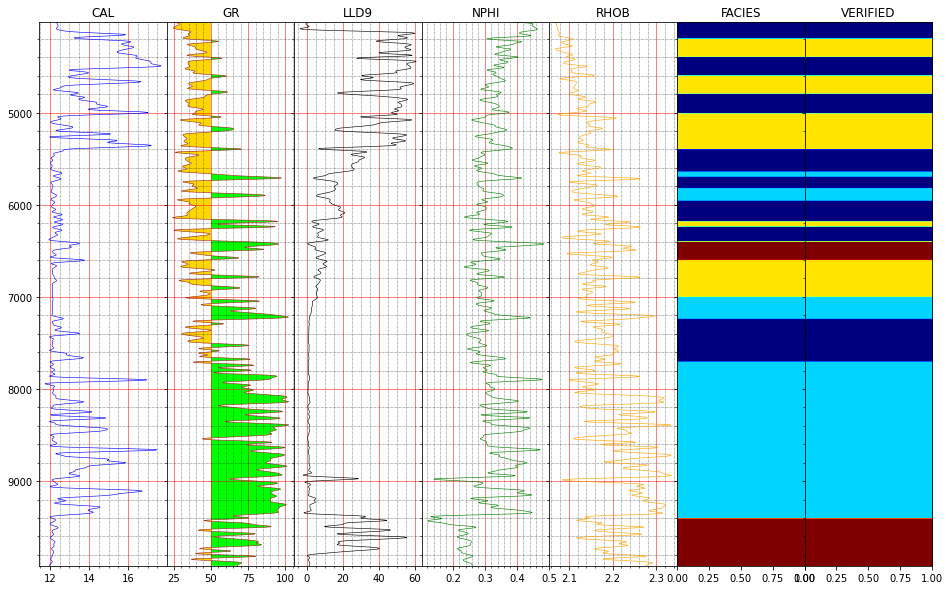

In [67]:
well_log_data = pred_log_data.values
rows, cols = 1, 7
fig,ax = plt.subplots(nrows = rows, ncols=cols, figsize=(16,10), sharey=True)
labels = ['DEPTH','CAL','GR','LLD9', 'NPHI','RHOB','FACIES']
color = ['blue','brown','black','green','orange','red','purple']
for i in range(cols):
    if i < cols-2:
        ax[i].plot(well_log_data[:,i+1],well_log_data[:,0], linewidth=0.6, color = color[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='red')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(well_log_data[:, 0]), min(well_log_data[:, 0]), 0)
        ax[i].set_title('%s' %labels[i+1])
    elif i==cols-2:
        F = np.vstack((well_log_data[:,-1],well_log_data[:,-1])).T
        m = ax[i].imshow(F, aspect='auto',cmap='jet', extent=[0,1,max(well_log_data[:,0]), min(well_log_data[:,0])])
        ax[i].set_title('%s' % labels[i + 1])
    elif i==cols-1:
        F = np.vstack((VERIFIED_FACIES,VERIFIED_FACIES)).T
        m = ax[i].imshow(F, aspect='auto',cmap='jet', extent=[0,1,max(well_log_data[:,0]), min(well_log_data[:,0])])
        ax[i].set_title('VERIFIED')
cl = 50
y2 = well_log_data[:,2]
y1 = y2*0+cl
ax[1].fill_betweenx(well_log_data[:, 0], y1, y2, where=(y1 >= y2), color='gold', linewidth=0)
ax[1].fill_betweenx(well_log_data[:, 0], y1, y2, where=(y1 < y2), color='lime', linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()

In [68]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(Ytrain, VERIFIED_FACIES)}")
print("Confusion Matrix:")
print(confusion_matrix(Ytrain, VERIFIED_FACIES))
print("Classification Report:")
print(classification_report(Ytrain, VERIFIED_FACIES, target_names=['SAND','SHALE','SHALY SAND','SANDY SHALE']))

Accuracy: 1.0
Confusion Matrix:
[[3577    0    0    0]
 [   0 4280    0    0]
 [   0    0 2500    0]
 [   0    0    0 1436]]
Classification Report:
              precision    recall  f1-score   support

        SAND       1.00      1.00      1.00      3577
       SHALE       1.00      1.00      1.00      4280
  SHALY SAND       1.00      1.00      1.00      2500
 SANDY SHALE       1.00      1.00      1.00      1436

    accuracy                           1.00     11793
   macro avg       1.00      1.00      1.00     11793
weighted avg       1.00      1.00      1.00     11793



### PREDICTING LITHOFACIES USING A BLIND WELL

In [58]:
file_path = "blind_lithofacies_clean_data.xlsx"
blind_data = pd.read_excel(file_path)
blind_data

,DEPTH,CAL,GR,LLD9,NPHI,RHOB
0,4449.0,12.616389,22.362584,0.831581,0.476268,1.971653
1,4449.5,12.613560,22.290274,0.842271,0.476178,1.971726
2,4450.0,12.610118,22.217275,0.850773,0.476096,1.971793
3,4450.5,12.606058,22.143771,0.856963,0.476023,1.971856
4,4451.0,12.601375,22.069954,0.860719,0.475960,1.971912
...,...,...,...,...,...,...
13199,11048.5,10.957541,12.253660,1.888357,0.287083,2.237580
13200,11049.0,10.956939,12.228615,1.888035,0.287099,2.237552
13201,11049.5,10.956441,12.208049,1.887771,0.287111,2.237530
13202,11050.0,10.956034,12.191362,1.887556,0.287121,2.237511


In [59]:
blind_data.describe()

,DEPTH,CAL,GR,LLD9,NPHI,RHOB
count,13204.000000,13204.000000,13204.000000,13204.000000,13204.000000,13204.000000
mean,7749.750000,13.220321,63.450124,8.274144,0.334857,2.150745
std,1905.905406,1.643449,27.421574,9.741211,0.066066,0.080111
min,4449.000000,10.955705,12.178002,-1.576987,0.233608,1.943947
25%,6099.375000,12.170799,39.110957,1.210660,0.284508,2.107574
50%,7749.750000,12.385958,56.840481,1.904721,0.318867,2.150293
75%,9400.125000,13.821360,89.363454,13.832949,0.374412,2.203932
max,11050.500000,17.858239,120.512265,31.981005,0.497372,2.339139


In [60]:
depth=blind_data.DEPTH.values
#gamma = blind_data.GR. values
gamma_min = 12.178002
gamma_max = 120.512265
#VSH = [(gamma_reading - gamma_min) / (gamma_max - gamma_min) for gamma_reading in gamma]
#blind_data['VSH'] = VSH

In [61]:
blind_data_scaled = blind_data.drop(columns=['DEPTH'])
blind_data_scaled

,CAL,GR,LLD9,NPHI,RHOB
0,12.616389,22.362584,0.831581,0.476268,1.971653
1,12.613560,22.290274,0.842271,0.476178,1.971726
2,12.610118,22.217275,0.850773,0.476096,1.971793
3,12.606058,22.143771,0.856963,0.476023,1.971856
4,12.601375,22.069954,0.860719,0.475960,1.971912
...,...,...,...,...,...
13199,10.957541,12.253660,1.888357,0.287083,2.237580
13200,10.956939,12.228615,1.888035,0.287099,2.237552
13201,10.956441,12.208049,1.887771,0.287111,2.237530
13202,10.956034,12.191362,1.887556,0.287121,2.237511


In [62]:
blind_data_scaled = sc.fit_transform(blind_data_scaled)

In [63]:
PREDICTED_FACIES = model.predict(blind_data_scaled)

In [64]:
blind_data['PREDICTED_FACIES'] = PREDICTED_FACIES 

In [65]:
blind_data

,DEPTH,CAL,GR,LLD9,NPHI,RHOB,PREDICTED_FACIES
0,4449.0,12.616389,22.362584,0.831581,0.476268,1.971653,1
1,4449.5,12.613560,22.290274,0.842271,0.476178,1.971726,1
2,4450.0,12.610118,22.217275,0.850773,0.476096,1.971793,1
3,4450.5,12.606058,22.143771,0.856963,0.476023,1.971856,1
4,4451.0,12.601375,22.069954,0.860719,0.475960,1.971912,1
...,...,...,...,...,...,...,...
13199,11048.5,10.957541,12.253660,1.888357,0.287083,2.237580,3
13200,11049.0,10.956939,12.228615,1.888035,0.287099,2.237552,3
13201,11049.5,10.956441,12.208049,1.887771,0.287111,2.237530,3
13202,11050.0,10.956034,12.191362,1.887556,0.287121,2.237511,3


### WELL LOG WITH PREDICTED FACIES

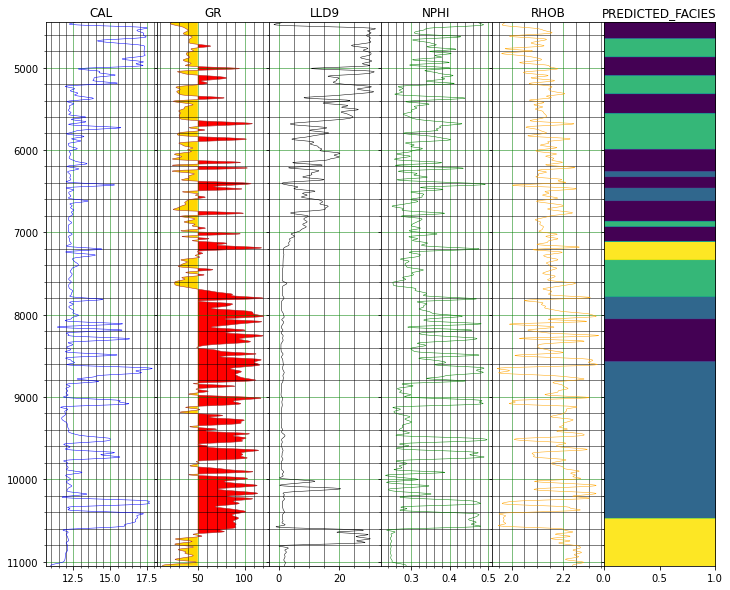

In [66]:
facies_log_data = blind_data.values
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
labels = ['CAL','GR','LLD9','NPHI','RHOB','PREDICTED_FACIES']
color = ['blue','brown','black','green','orange','red','purple']
for i in range(cols):
    if i<cols-1:
        ax[i].plot(facies_log_data[:,i+1], facies_log_data[:,0],linewidth='0.5', color= color[i])
        ax[i].set_ylim(max(facies_log_data[:,0]), min(facies_log_data[:,0]))
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5',color='green')
        ax[i].grid(which='minor', linestyle='-', linewidth='0.5',color='black')
        ax[i].set_title(labels[i])
    elif i==cols-1:
        F = np.vstack((facies,facies)).T
        ax[i].imshow(F, aspect='auto',extent=[0,1,max(facies_log_data[:, 0]), min(facies_log_data[:, 0])])
        ax[i].set_title(labels[i])

y2=facies_log_data[:,2] #particular column to color
y1=y2*0+50 #shale line
ax[1].fill_betweenx(facies_log_data[:,0], y1,y2, where=(y1>=y2), color='gold',linewidth=0) 
ax[1].fill_betweenx(facies_log_data[:,0], y1,y2, where=(y1<y2), color='red',linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()